VISION TRANSFORMER

In [ ]:
pip list

In [ ]:
pip install numpy

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
import tensorflow_addons as tfa 

In [ ]:
pip install tensorflow-addons

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
import tensorflow_addons as tfa 
num_classes = 10
input_shapre =  (32, 32,3)
(X_train, y_train),(X_test , y_test) = keras.datasets.cifar10.load_data()
learning_rate = 0.001
weigth_decay = 0.0001
batch_size = 256
num_epochs = 40
image_size = 72
patch_size = 6
num_heads = 4
transformer_units = [
    projection_dim*2,
    projection_dim
]
transformer_layers = 8
mlp_head_units = [2048 , 1024]
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size,image_size),
        layers.RandomFLip("horizontal"),
        layers.RandomRotation(factor=0.2),
    ],
    name = "data_augmentation"
)
data_augmentation.layers[0].adapt(X_train)
def mlp(x,hidden_units,dropout_rate):
    for units in hidden_units:
        x=layers.Dense(units,activation =tf.nn.gelu)(x)
        x= layers.Dropout(dropout_rate)(x)
    return x
class Patches(layers.layer):
    def __init__(self , patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self , images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1,self.patch_size, self,patch_size,1],
            strides = [1,self.patch_size, self,patch_size,1],
            rates = [1,1,1,1],
            padding = "VALID",
        )    
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches,[batch_size,-1,patch_size])
        return patches
    import matplotlib.pyplot as plt

    plt.figure(figsize=(4,4))
    image = X_train[np.random.choice(range(X_train.shape[0]))]
    plt.imshow(image.astype("uint8"))
    plt.axis("off")

    resized_image = tf.image.resize(
        tf.convert_to_tensor([image]),size =(image_size,image_size)
    ) 
    patches = Patches(patch_size)(resized_image)
    print(f"Image size: {image_size} X {image_size}")
    print(f"Patch size: {patch_size} X {patch_size}")
    print(f"Patches per Image: {patches.shape[1]}")
    print(f"Elements per patch: {patches.shape[-1]}")

    n= int(np.sqrt(patches.shape[1]))
    plt.figure(figsize=(4,4))
    for i, patch in enumerate(patches[0]):
        ax = plt.subplot(n,n,i+1)
        patch_img = tf.reshape(patch,(patch_size,patch_size,3))
        plt.imshow(patch_img.numpy().astype("uint8"))
        plt.axis("off")



In [ ]:
pip install tensorflow==2.8.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

num_classes = 10
input_shape = (32, 32, 3)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 40
image_size = 72
patch_size = 6
num_patches = (image_size // patch_size)**2 
num_heads = 4
projection_dim = 64
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 8
mlp_head_units = [2048, 1024]

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.2),
    ],
    name="data_augmentation"
)

data_augmentation.layers[0].adapt(X_train)


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

import matplotlib.pyplot as plt
# Visualize patches
plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per Image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

plt.show()  # Display the visualization

class PatchEncoder(layers.Layer):
    def __init__(self,num_patches,projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units = projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim = num_patches, output_dim = projection_dim 
        )
    def call(self,patch):
        positions = tf.range(start=0 , limit =self.num_patches,delta =1)
        encoded = self.projection(patch) + self.postion_embedding(positions)
        return encoded
    def create_vit_classifier():
        inputs = layers.Input(shape=input_shape)
        augmented = data_augmentation(inputs)
        patches = Patches(patch_size)(augmented)
        encoded_patches = PatchEncoder(num_patches,projection_dim)(patches)

        for __ in range(transformer_layers):
            x1= layers.LayerNormalization(epsilon = 1e-6)(encoded_patches)
            attention_output = layers.MultiHeadAttention(
                num_heads = num_heads,key_dim=projection_dim,dropout = 0.1
            )(x1,x1)
            x2= layers.Add()([attention_output,encoded_patches])
            x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
            x3=mlp(x3,hidden_units=transformer_units,dropout_rate=0.1)
            encoded_patches = layers.Add()([x3,x2])
            representation = layers.LayerNormalization(epsilon =1e-6)(encoded_patches)
            representation = layers.Flatten()(representation)
            representation = layers.Dropout(0.5)(representation)
            features = mlp(representation,hidden_units=mlp_head_units,dropout_rate=0.5)
            logits = layers.Dense(num_classes)(features)
            model = keras.Model(input=inputs,output=logits)
            return model
    def run_experiment(model):
        optimizer = tfa.optimizers.AdamW(
            learning_rate=learning_rate,weight_decay=weight_decay
        )

        model.compile(
            optimizer=optimizer,
            loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[
                keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top_5_accuracy"),
            ],
        )
        checkpoint_filepath = "C:\Python311"
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            checkpoint_filepath,
            monitor = "val_accuracy",
            save_best_only=True,
            save_weights_only=True,
        )
        history = model.fit(
            x=X_train,
            y=y_train,
            batch_size = batch_size,
            epochs = num_epochs,
            validation_split = 0.1,
            callbacks=[checkpoint_callback],
        )
        model.load_weights(checkpoint_filepath)
        _, accuracy, top_5_accuracy = model.evaluate(X_test,y_test)
        print(f"Test accuracy:{round(accuracy*100,2)}%")
        print(f"Test Top 5 accuracy:{round(top_5_accuracy*100,2)}%")
        vit_classifier = create_vit_classifier()
        history = run_experiment(vit_classifier)



Image size: 72 X 72
Patch size: 6 X 6
Patches per Image: 144
Elements per patch: 108


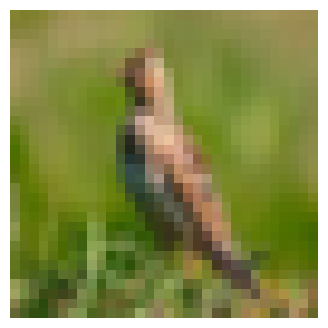

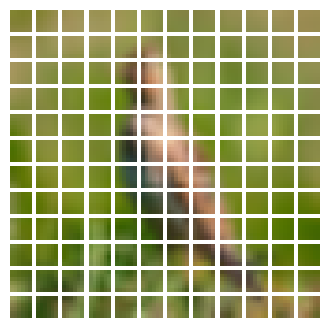

NameError: name 'vit_classifier' is not defined

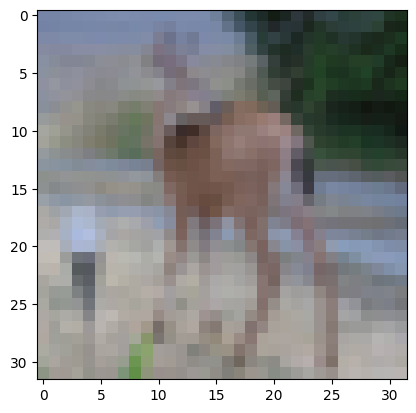

In [6]:
import numpy as np
from sklearn.base import is_classifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

num_classes = 10
input_shape = (32, 32, 3)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 40
image_size = 72
patch_size = 6
num_patches = (image_size // patch_size)**2 
num_heads = 4
projection_dim = 64
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 8
mlp_head_units = [2048, 1024]

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.2),
    ],
    name="data_augmentation"
)

data_augmentation.layers[0].adapt(X_train)


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

import matplotlib.pyplot as plt
# Visualize patches
plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per Image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

plt.show()  # Display the visualization

class PatchEncoder(layers.Layer):
    def __init__(self,num_patches,projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units = projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim = num_patches, output_dim = projection_dim 
        )
    def call(self,patch):
        positions = tf.range(start=0 , limit =self.num_patches,delta =1)
        encoded = self.projection(patch) + self.postion_embedding(positions)
        return encoded
    def create_vit_classifier():
        inputs = layers.Input(shape=input_shape)
        augmented = data_augmentation(inputs)
        patches = Patches(patch_size)(augmented)
        encoded_patches = PatchEncoder(num_patches,projection_dim)(patches)

        for __ in range(transformer_layers):
            x1= layers.LayerNormalization(epsilon = 1e-6)(encoded_patches)
            attention_output = layers.MultiHeadAttention(
                num_heads = num_heads,key_dim=projection_dim,dropout = 0.1
            )(x1,x1)
            x2= layers.Add()([attention_output,encoded_patches])
            x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
            x3=mlp(x3,hidden_units=transformer_units,dropout_rate=0.1)
            encoded_patches = layers.Add()([x3,x2])
            representation = layers.LayerNormalization(epsilon =1e-6)(encoded_patches)
            representation = layers.Flatten()(representation)
            representation = layers.Dropout(0.5)(representation)
            features = mlp(representation,hidden_units=mlp_head_units,dropout_rate=0.5)
            logits = layers.Dense(num_classes)(features)
            model = keras.Model(input=inputs,output=logits)
            return model
    def run_experiment(model):
        optimizer = tfa.optimizers.AdamW(
            learning_rate=learning_rate,weight_decay=weight_decay
        )

        model.compile(
            optimizer=optimizer,
            loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[
                keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top_5_accuracy"),
            ],
        )
        checkpoint_filepath = "C:\Python311"
        checkpoint_callback = keras.callbacks.ModelCheckpoint(
            checkpoint_filepath,
            monitor = "val_accuracy",
            save_best_only=True,
            save_weights_only=True,
        )
        history = model.fit(
            x=X_train,
            y=y_train,
            batch_size = batch_size,
            epochs = num_epochs,
            validation_split = 0.1,
            callbacks=[checkpoint_callback],
        )
        model.load_weights(checkpoint_filepath)
        _, accuracy, top_5_accuracy = model.evaluate(X_test,y_test)
        print(f"Test accuracy:{round(accuracy*100,2)}%")
        print(f"Test Top 5 accuracy:{round(top_5_accuracy*100,2)}%")
        vit_classifier = create_vit_classifier() # type: ignore
        history = run_experiment(vit_classifier) # type: ignore
class_names = [
               'airplane'
               'automobile'
               'bird'
               'cat'
               'deer'
               'dog'
               'frog'
               'horse'
               'ship'
               'truck'  
]
def img_predict(images, model):
    if len(images.shape) == 3:
        out = model.predict(images.reshape(-1, *images.shape))
    else:
        out = model.predict(images)
    prediction = np.argmax(out, axis=1)
    img_prediction = [class_names[i] for i in prediction]
    return img_prediction

index = 100
plt.imshow(X_test[index])
prediction = img_predict(X_test[index], vit_classifier) # type: ignore
print(prediction)


Image size: 72 X 72
Patch size: 6 X 6
Patches per Image: 144
Elements per patch: 108


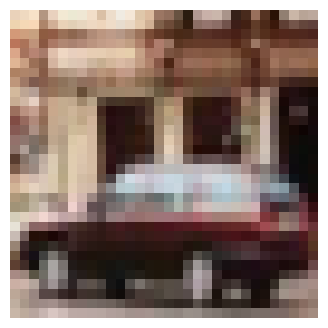

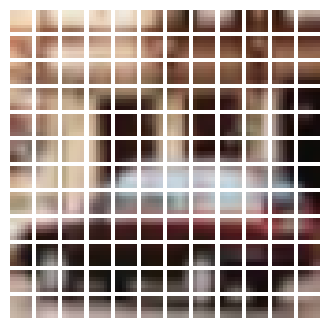

Epoch 1/40




KeyboardInterrupt



In [7]:
import numpy as np
from sklearn.base import is_classifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

num_classes = 10
input_shape = (32, 32, 3)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 40
image_size = 72
patch_size = 6
num_patches = (image_size // patch_size)**2 
num_heads = 4
projection_dim = 64
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 8
mlp_head_units = [2048, 1024]

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.2),
    ],
    name="data_augmentation"
)

data_augmentation.layers[0].adapt(X_train)


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Visualize patches
plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per Image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

plt.show()  # Display the visualization

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim 
        )
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches = layers.Add()([x3, x2])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top_5_accuracy"),
        ],
    )
    checkpoint_filepath = "C:/Python311"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test Top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

# Create and train the model
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

def img_predict(images, model):
    if len(images.shape) == 3:
        out = model.predict(images.reshape(-1, *images.shape))
    else:
        out = model.predict(images)
    prediction = np.argmax(out, axis=1)
    img_prediction = [class_names[i] for i in prediction]
    return img_prediction

index = 100
plt.imshow(X_test[index])
prediction = img_predict(X_test[index], vit_classifier)
print(prediction)


In [5]:
X_train = X_train[:500]
y_train = y_train[:500]
X_test = X_test[:500]
X_train = X_train[:500]

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

num_classes = 10
input_shape = (32, 32, 3)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 40
image_size = 72
patch_size = 6
num_patches = (image_size // patch_size) ** 2
num_heads = 4
projection_dim = 64
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 8
mlp_head_units = [2048, 1024]

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.2),
    ],
    name="data_augmentation"
)

data_augmentation.layers[0].adapt(X_train)


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded


def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top_5_accuracy"),
        ],
    )

    checkpoint_filepath = "C:\\Python311\\model_checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_sparse_categorical_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test Top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")


class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]


def img_predict(images, model):
    if len(images.shape) == 3:
        out = model.predict(images.reshape(-1, *images.shape))
    else:
        out = model.predict(images)
    prediction = np.argmax(out, axis=1)
    img_prediction = [class_names[i] for i in prediction]
    return img_prediction


vit_classifier = create_vit_classifier()
run_experiment(vit_classifier)


Epoch 1/40



FINAL VIT TRANSFORMER CODE 

In [3]:
pip install tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


Image size: 72 X 72
Patch size: 6 X 6
Patches per Image: 144
Elements per patch: 108


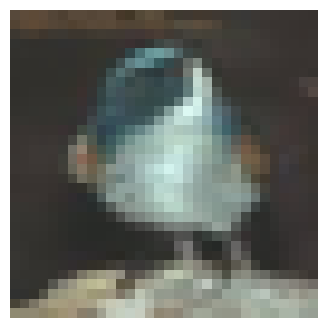

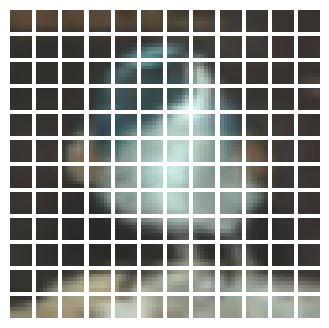

Epoch 1/40


: 

In [8]:
import numpy as np
from sklearn.base import is_classifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

num_classes = 10
input_shape = (32, 32, 3)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 40
image_size = 72
patch_size = 6
num_patches = (image_size // patch_size)**2 
num_heads = 4
projection_dim = 64
transformer_units = [projection_dim * 2, projection_dim]
transformer_layers = 8
mlp_head_units = [2048, 1024]

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.2),
    ],
    name="data_augmentation"
)

data_augmentation.layers[0].adapt(X_train)


def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x


class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Visualize patches
plt.figure(figsize=(4, 4))
image = X_train[np.random.choice(range(X_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per Image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

plt.show()  # Display the visualization

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim 
        )
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches = layers.Add()([x3, x2])
    
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(k=5, name="top_5_accuracy"),
        ],
    )
    checkpoint_filepath = "C:/Python311"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test Top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

# Create and train the model
vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)